In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [136]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [685]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시 착한가격업소 현황\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시 착한가격업소 현황\\서울시 착한가격업소 현황.csv']

In [686]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,업소아이디,업소명,분류코드,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,추천수,기준년월,업소 사진
0,6017,아폴로헤어크리닉,5,이 미용업,서울특별시 중랑구 사가정로50길 67 (면목동),495-7337,면목골목시장 65호,영업시간 :09:00~21:00 좌석수 :5 휴무일 :매주 수요일 예약 :불가능 카...,면목시장내 위치 형편이 어려우신 분은 요금을 할인해주며 20년간 봉사활동을 하시는 ...,450,22-6,http://tearstop.seoul.go.kr/mulga/photo/201511...
1,6015,상록수미용실,5,이 미용업,서울특별시 중랑구 동일로99길 22 (면목동),NaN,면목2동 다울아파트에서 동일로로 가는 골목에 위치,영업시간 : 09:30~21:00 좌석수 : 3 휴무일 : 매주 일요일 예약 :불가...,주 고객이 어르신들이라 가격을 저렴하게 책정하여 파마 14000원 등 파격적인 요금...,432,22-6,http://tearstop.seoul.go.kr/mulga/photo/201511...
2,4506,열린미용실,5,이 미용업,서울특별시 관악구 난곡로40길 16 (신림동),NaN,미성동 노선버스 신일교회앞 하차,영업시간 : 오전 9시 ~ 오후 8시 휴무일 : 매주 일요일 예약 : 가능 카드 :...,▷관악구 평균가격보다 20%이상 저렴. ▷경로자 장애인 할인해 드림 ▷한달에 한번씩...,336,22-6,http://tearstop.seoul.go.kr/mulga/photo/202207...
3,3002,미림17분칼라,13,기타서비스업종,서울특별시 관악구 호암로26길 1 (신림동),871-7070,미림여고 입구 국민은행 옆 위치,영업시간 :오전 9시 30분 ~ 오후 9시 30분 휴무일 : 매월 둘째 넷째주 일...,▷관악구 평균가격(인화료 -3*5cm) 보다 20% 저렴,318,22-6,http://tearstop.seoul.go.kr/mulga/photo/202207...
4,4242,덕성이발관,5,이 미용업,서울특별시 관악구 장군봉2길 11 (봉천동),882-5875,봉천역 3번 출구에서 시장골목으로 100미터,영업시간 : 오전 7시 ~ 오후 9시 좌석수 : 4 휴무일 : 매주 화요일 주차 :...,▷관악구 평균가격보다 10%이상 저렴 ▷시설이 세련되지는 않았지만 동네 사랑방 같은...,264,22-6,http://tearstop.seoul.go.kr/mulga/photo/201204...


In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   업소아이디    1118 non-null   int64 
 1   업소명      1118 non-null   object
 2   분류코드     1118 non-null   int64 
 3   분류코드명    1118 non-null   object
 4   업소 주소    1118 non-null   object
 5   업소 전화번호  1070 non-null   object
 6   찾아오시는 길  552 non-null    object
 7   업소정보     1103 non-null   object
 8   자랑거리     845 non-null    object
 9   추천수      1118 non-null   int64 
 10  기준년월     1118 non-null   object
 11  업소 사진    1118 non-null   object
dtypes: int64(3), object(9)
memory usage: 104.9+ KB


In [688]:
df.describe()

,업소아이디,분류코드,추천수
count,1118.000000,1118.000000,1118.000000
mean,8540.280859,2.901610,8.206619
std,1498.602496,2.595219,35.040190
min,263.000000,1.000000,0.000000
25%,8282.250000,1.000000,0.000000
50%,9042.500000,1.000000,0.000000
75%,9372.750000,5.000000,3.000000
max,9658.000000,13.000000,450.000000


In [689]:
df.describe(include=np.object)

,업소명,분류코드명,업소 주소,업소 전화번호,찾아오시는 길,업소정보,자랑거리,기준년월,업소 사진
count,1118,1118,1118,1070,552,1103,845,1118,1118
unique,1071,10,1104,1027,544,839,685,1,984
top,홍두깨손칼국수,한식,서울특별시 광진구 능동로48길 75,없음,,영업시간 : 좌석수 : 휴무일 : 배달 : 예약 : 카드 : 주차 : 홈페이지 주소...,저렴한 가격 깨끗한 위생,22-6,http://tearstop.seoul.go.kr/mulga/photo/
freq,4,594,4,20,4,51,97,1118,135


In [690]:
df.isnull().sum()

업소아이디        0
업소명          0
분류코드         0
분류코드명        0
업소 주소        0
업소 전화번호     48
찾아오시는 길    566
업소정보        15
자랑거리       273
추천수          0
기준년월         0
업소 사진        0
dtype: int64

**업종,오픈시간,마감시간,지역 분포는?**

**배달,예약 가능 여부?**

**가격,친절함,위생 비율은?**

## 전처리


In [691]:
df.drop(['업소아이디', '분류코드', '찾아오시는 길', '업소 전화번호', '업소 사진','기준년월'],axis=1,inplace=True)

In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   업소명     1118 non-null   object
 1   분류코드명   1118 non-null   object
 2   업소 주소   1118 non-null   object
 3   업소정보    1103 non-null   object
 4   자랑거리    845 non-null    object
 5   추천수     1118 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 52.5+ KB


In [693]:
df = df.fillna('None')

In [694]:
def convert_time(x):
     try:
          if x == 'None' or x.strip() == 'null':
               return 'None'
          if re.findall(r'영업시간.*?(24[ ]*시간).?',x):
               return '24시간'
          work_time = re.findall(r'영업시간.*?[오전]?[ ]*([0-9]*)시.*?([0-9]*)[분]?.*?[오후]?[ ]*([0-9]*)시[ ]*([0-9]*)[분]?',x)
          if work_time:
               s_h, s_m, e_h, e_m = work_time[0]
               s_h, s_m, e_h, e_m = s_h.zfill(2)[:2], s_m.zfill(2)[:2], e_h.zfill(2)[:2], e_m.zfill(2)
          else:
               work_time = re.findall(r'[이용영업]시간[ ]*[-:][ ]*[오전AM]*([0-9]*)[ ]*[;:][ ]*([0-9]*)[ ]*.*?[-~^][ PM오후익일저녁.]*([ 0-9]*)[: ]*([0-9]*).*?',x)
               s_h, s_m, e_h, e_m = work_time[0]
               s_h, s_m, e_h, e_m = s_h.zfill(2)[:2], s_m.zfill(2)[:2], e_h.zfill(2)[:2], e_m.zfill(2)
          return f'{s_h}:{s_m}~{e_h}:{e_m}'
     except:
          return 'None'

In [695]:
df['시간정보'] = df['업소정보'].apply(convert_time).values

In [698]:
def start_time(x):
    if x=='None' or x=='24시간':
        return x
    else:
        return x.split('~')[0]
def end_time(x):
    if x=='None' or x=='24시간':
        return x
    else:
        e_h,e_m = x.split('~')[1].split(':')
        if e_h == '00':
            e_h = e_m
            e_m = '00'
        if 4<int(e_h)<13:
            e_h = str(int(e_h)+12)
        return f'{e_h}:{e_m}'

In [699]:
df['오픈시간'] = df['시간정보'].apply(start_time)
df['마감시간'] = df['시간정보'].apply(end_time)

In [700]:
def convert_delivery(x):
    if x == 'None' or not re.findall(r'배[ ]*달[ ]*:[ ]*([불]?[ ]*가[ ]*[능]?).?',x):
        return 'None'
    elif re.findall(r'배[ ]*달[ ]*:[ ]*(불[ ]*가).?',x):
        return '불가능'
    else:
        return '가능'

In [701]:
def convert_reserve(x):
    if x == 'None' or not re.findall(r'예[ ]*약[ ]*:[ ]*([불]?[ ]*가[ ]*[능]?).?',x):
        return 'None'
    elif re.findall(r'예[ ]*약[ ]*:[ ]*(불[ ]*가).?',x):
        return '불가능'
    else:
        return '가능'

In [702]:
df['배달'] = df['업소정보'].apply(convert_delivery).values
df['예약'] = df['업소정보'].apply(convert_reserve).values

In [703]:
def convert_price(x):
    if '할인' in x or '저렴' in x:
        return '저렴함'
    else:
        return '보통'
def convert_attitude(x):
    if '친절' in x:
        return '좋음'
    else:
        return '보통'
def convert_clean(x):
    if '신선' in x or '깨끗' in x or '깔끔' in x or '위생' in x or '청결' in x:
        return '좋음'
    else:
        return '보통'


In [704]:
df['가격'] = df['자랑거리'].apply(convert_price)
df['친절함'] = df['자랑거리'].apply(convert_attitude)
df['위생'] = df['자랑거리'].apply(convert_clean)

In [724]:
def convert_address(x):
    area = re.search(r'.*?구 ',x)
    if area:
        return area[0].split()[-1]
    else:
        return 'None'

df['지역'] = df['업소 주소'].apply(convert_address)

In [725]:
df.head()

,업소명,분류코드명,업소 주소,업소정보,자랑거리,추천수,시간정보,오픈시간,마감시간,배달,예약,가격,친절함,위생,지역
0,아폴로헤어크리닉,이 미용업,서울특별시 중랑구 사가정로50길 67 (면목동),영업시간 :09:00~21:00 좌석수 :5 휴무일 :매주 수요일 예약 :불가능 카...,면목시장내 위치 형편이 어려우신 분은 요금을 할인해주며 20년간 봉사활동을 하시는 ...,450,09:00~21:00,09:00,21:00,None,불가능,저렴함,보통,보통,중랑구
1,상록수미용실,이 미용업,서울특별시 중랑구 동일로99길 22 (면목동),영업시간 : 09:30~21:00 좌석수 : 3 휴무일 : 매주 일요일 예약 :불가...,주 고객이 어르신들이라 가격을 저렴하게 책정하여 파마 14000원 등 파격적인 요금...,432,09:30~21:00,09:30,21:00,None,불가능,저렴함,좋음,보통,중랑구
2,열린미용실,이 미용업,서울특별시 관악구 난곡로40길 16 (신림동),영업시간 : 오전 9시 ~ 오후 8시 휴무일 : 매주 일요일 예약 : 가능 카드 :...,▷관악구 평균가격보다 20%이상 저렴. ▷경로자 장애인 할인해 드림 ▷한달에 한번씩...,336,09:00~08:00,09:00,20:00,None,가능,저렴함,보통,보통,관악구
3,미림17분칼라,기타서비스업종,서울특별시 관악구 호암로26길 1 (신림동),영업시간 :오전 9시 30분 ~ 오후 9시 30분 휴무일 : 매월 둘째 넷째주 일...,▷관악구 평균가격(인화료 -3*5cm) 보다 20% 저렴,318,09:00~09:30,09:00,21:30,None,None,저렴함,보통,보통,관악구
4,덕성이발관,이 미용업,서울특별시 관악구 장군봉2길 11 (봉천동),영업시간 : 오전 7시 ~ 오후 9시 좌석수 : 4 휴무일 : 매주 화요일 주차 :...,▷관악구 평균가격보다 10%이상 저렴 ▷시설이 세련되지는 않았지만 동네 사랑방 같은...,264,07:00~09:00,07:00,21:00,None,가능,저렴함,보통,보통,관악구


##  시각화

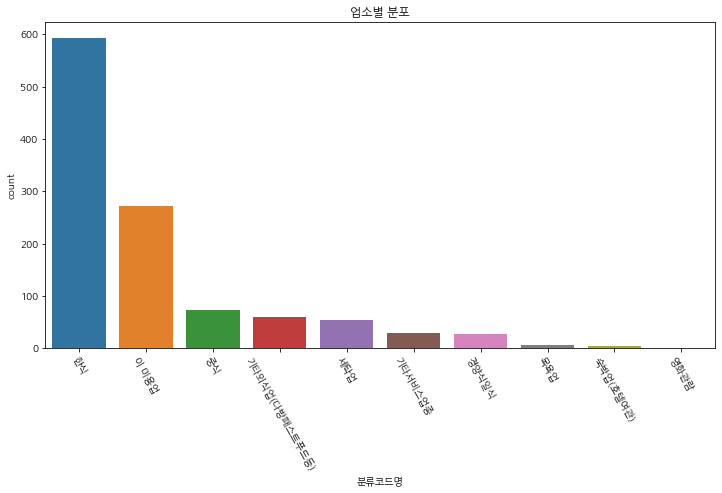

In [733]:
sub_df = df.groupby(by=['분류코드명'],as_index=False)['업소명'].count().sort_values(['업소명'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='분류코드명',y='업소명').set(title='업소별 분포',ylabel='count')
g=plt.xticks(rotation=-60)

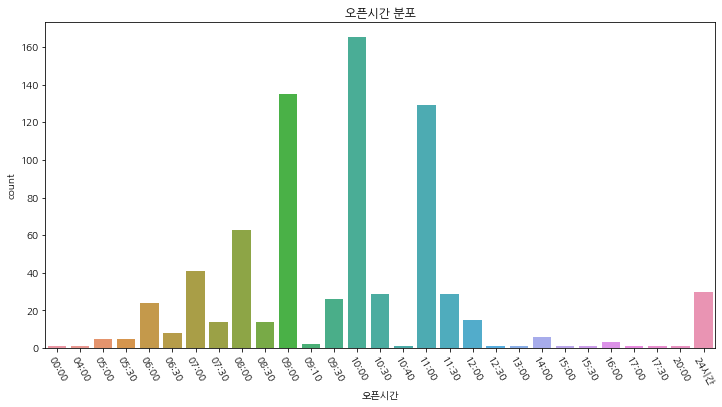

In [718]:
sub_df = df[df['오픈시간']!='None'].groupby(by=['오픈시간'],as_index=False)['업소명'].count().sort_values(['오픈시간'])
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='오픈시간',y='업소명').set(title='오픈시간 분포',ylabel='count')
g=plt.xticks(rotation=-60)

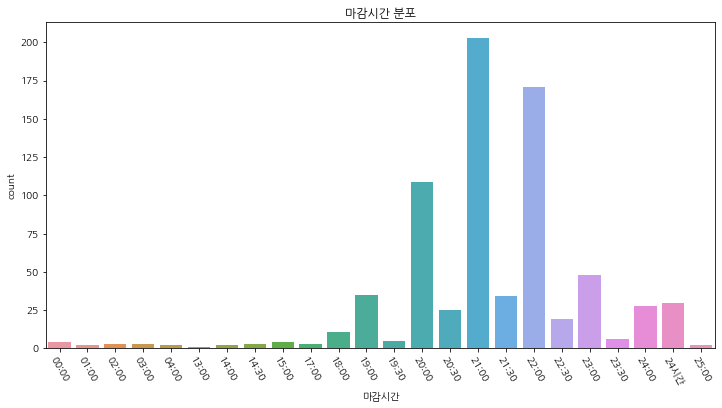

In [719]:
sub_df = df[df['마감시간']!='None'].groupby(by=['마감시간'],as_index=False)['업소명'].count().sort_values(['마감시간'])
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='마감시간',y='업소명').set(title='마감시간 분포',ylabel='count')
g=plt.xticks(rotation=-60)

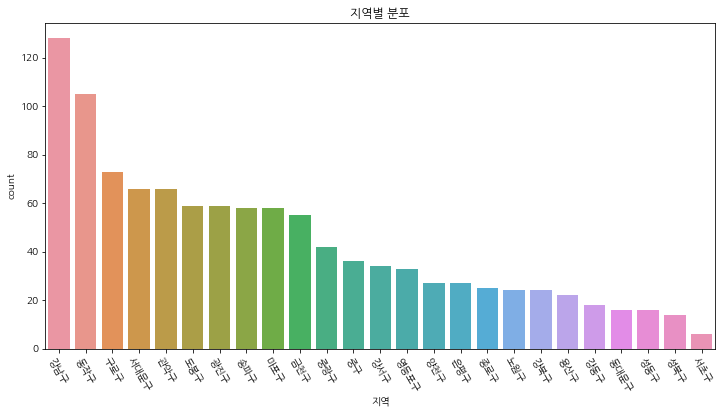

In [726]:
sub_df = df[df['지역']!='None'].groupby(by=['지역'],as_index=False)['업소명'].count().sort_values(['업소명'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='지역',y='업소명').set(title='지역별 분포',ylabel='count')
g=plt.xticks(rotation=-60)

[Text(0.5, 1.0, '배달별 분포'), Text(0, 0.5, 'count')]

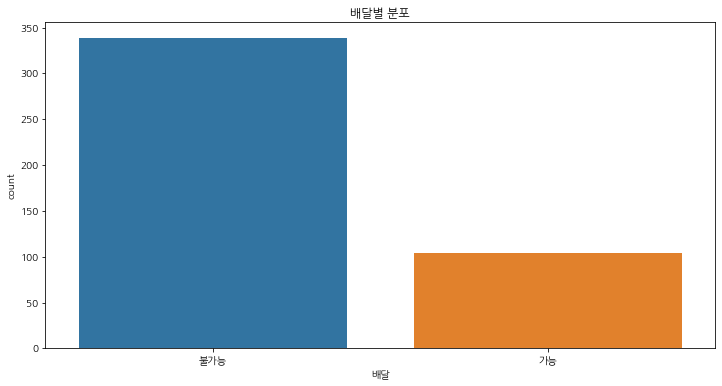

In [728]:
sub_df = df[df['배달']!='None'].groupby(by=['배달'],as_index=False)['업소명'].count().sort_values(['업소명'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='배달',y='업소명').set(title='배달별 분포',ylabel='count')

[Text(0.5, 1.0, '예약별 분포'), Text(0, 0.5, 'count')]

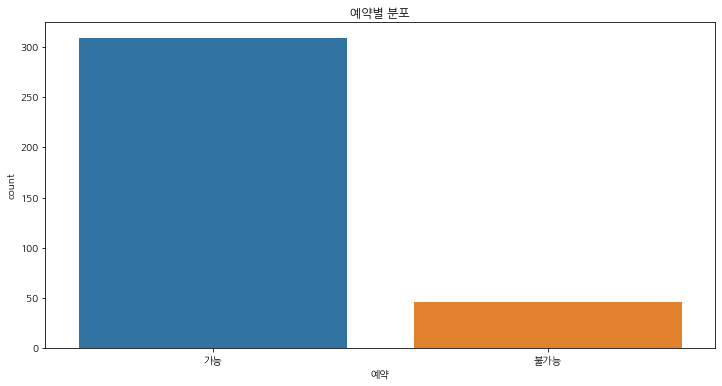

In [729]:
sub_df = df[df['예약']!='None'].groupby(by=['예약'],as_index=False)['업소명'].count().sort_values(['업소명'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='예약',y='업소명').set(title='예약별 분포',ylabel='count')

[Text(0.5, 1.0, '가격별 분포'), Text(0, 0.5, 'count')]

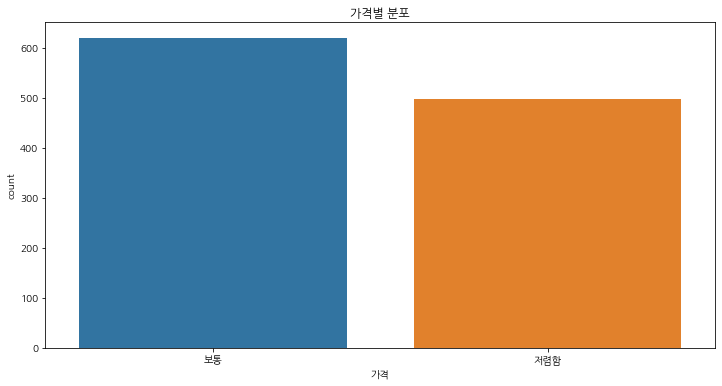

In [730]:
sub_df = df[df['가격']!='None'].groupby(by=['가격'],as_index=False)['업소명'].count().sort_values(['업소명'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='가격',y='업소명').set(title='가격별 분포',ylabel='count')

[Text(0.5, 1.0, '친절함별 분포'), Text(0, 0.5, 'count')]

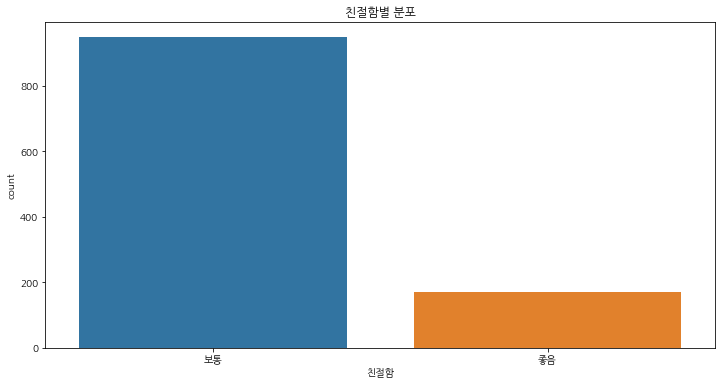

In [731]:
sub_df = df[df['친절함']!='None'].groupby(by=['친절함'],as_index=False)['업소명'].count().sort_values(['업소명'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='친절함',y='업소명').set(title='친절함별 분포',ylabel='count')

[Text(0.5, 1.0, '위생별 분포'), Text(0, 0.5, 'count')]

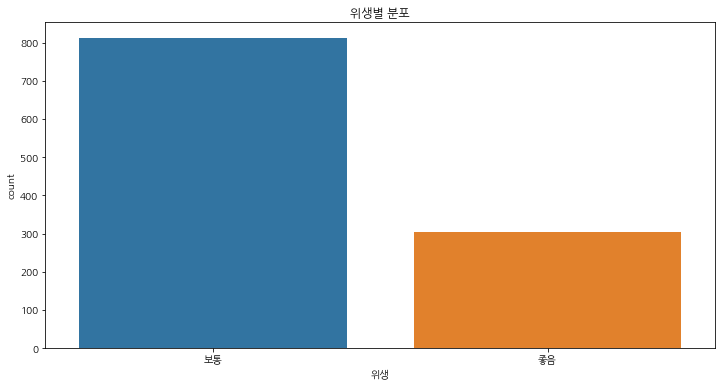

In [732]:
sub_df = df[df['위생']!='None'].groupby(by=['위생'],as_index=False)['업소명'].count().sort_values(['업소명'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=sub_df,x='위생',y='업소명').set(title='위생별 분포',ylabel='count')

## 분석 결과

**업종,오픈시간,마감시간,지역 분포는?**

- 대부분 외식업과 이 미용업으로 구성되어 있다.

- 8시-11시 사이에 주로 오픈을 한다.

- 20시-22시 사이에 주로 마감을 한다.

- 강남구,동작구가 가장 높고 구로구,서대문구,관악구가 그 다음으로 높다.

**배달,예약 가능 여부?**

- 대부분 배달이 불가능하지만, 예약은 대부분 가능하다.

**가격,친절함,위생 비율은?**

- 절반 가까운 매장이 저렴함을 강점으로 가지고 있지만 위생과 친절함이 강점인 매장 비율은 높지 않다.